In [1]:
## MEASLES -vs- VACCINE ANALYSIS ##
## CA682 ASSIGNMENT ##
## SAM COOGAN, ANUSHKA WALSEPATIL ##
## DUBLIN CITY UNIVERSITY, IRELAND ##

import pandas as pd

# Import measles dataset
measles_csv = "https://raw.githubusercontent.com/samcoogan/CA682_Assignment/main/data/measles-worldwide.csv"
df = pd.read_csv(measles_csv)

# Import country codes dataset to map continent onto dataframe
countrycodes_csv = "https://raw.githubusercontent.com/samcoogan/CA682_Assignment/main/data/country-codes.csv"
df_countrycodes = pd.read_csv(countrycodes_csv)

# Drop records of years before 1974
df_years = df.drop(df[(df.Year < 1974)].index)

## Seperating measles and vaccines datasets for analysis, move year column to header ##
# Organize data into serperate datasets for measles and vaccine rates
df_measles = df_years[['Country','Year','Measles Rate']]
df_vaccine = df_years[['Country','Year','Vaccine Rate']]

# Pivot the year column to the header of dataframe
measles_table = df_measles.pivot(index='Country',columns='Year',values='Measles Rate')
vaccine_table = df_vaccine.pivot(index='Country',columns='Year',values='Vaccine Rate')

# Flatten the dataframe
df_measles = pd.DataFrame(measles_table.to_records())
df_vaccine = pd.DataFrame(vaccine_table.to_records())

# Set index to country, drop empty rows 
df_measles = df_measles.set_index('Country')
df_measles = df_measles.dropna(axis=0,how='all')
df_vaccine = df_vaccine.set_index('Country')
df_vaccine = df_vaccine.dropna(axis=0,how='all')

# Reset dataset index
df_measles = df_measles.reset_index()
df_vaccine = df_vaccine.reset_index()

# Save new vaccine and measles dataset locally
# df_measles.to_csv("df_measles.csv", encoding='utf-8', index=False)
# df_vaccine.to_csv("df_vaccine.csv", encoding='utf-8', index=False)

## Create dataframe for world data ##
# Initialize World dataframe
df_world = df_years[['Country','Year','Measles Rate','Vaccine Rate']]
df_world = df_world[df_world.Country == 'World']

# Normazlie measles rate for visual comparison with vaccine rate
df_world['Measles Rate'] = df_world['Measles Rate'] / 10

## Countries data Frame ##
# Initialize Countries dataframe
df_countries = df_years[['Country','Code','Year','Measles Rate','Vaccine Rate']]

# Create dictionary of country codes to continent
codes_to_continent = zip(df_countrycodes.code_3, df_countrycodes.continent)
continent_dict = dict(codes_to_continent)

# Map continent column onto countries dataframe using dictionary
df_countries['continent'] = df_countries['Code'].map(continent_dict)

# New Section

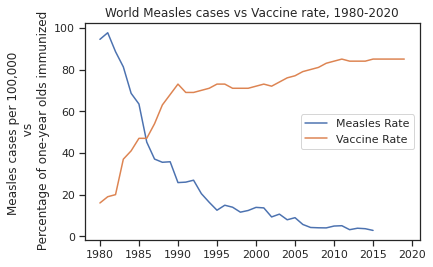

In [6]:
## Visualizations
# World Measles cases vs immunization rate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
df_world.plot(title="World Measles cases vs Vaccine rate, 1980-2020",kind="line", x="Year", y=["Measles Rate","Vaccine Rate"], ylabel="Measles cases per 100,000 \n  vs \n Percentage of one-year olds immunized", xlabel="")
plt.show()

In [3]:
# Generate labels for x-axis 
%%capture
xticks =[]
xlabels = []
for i in range(1974, 2020):
  xticks.append(i)
  xlabels.append(str(i))

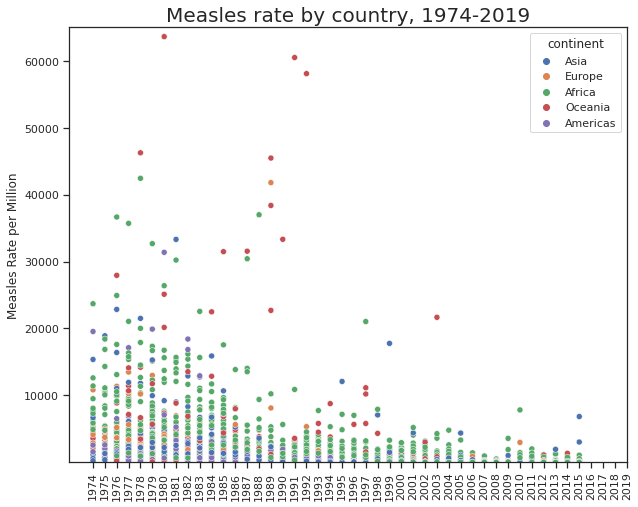

In [4]:
# Measles rate by country 1974-2019
plt.figure(figsize = (10,8))
plt.title("Measles rate by country, 1974-2019",fontsize=20)
measles_scatter = sns.scatterplot(data = df_countries, x="Year", y="Measles Rate", hue="continent")
measles_scatter.set(ylim=(1,65000),ylabel="Measles Rate per Million",xlabel="")
plt.xticks(xticks,xlabels,rotation=90)
plt.show()

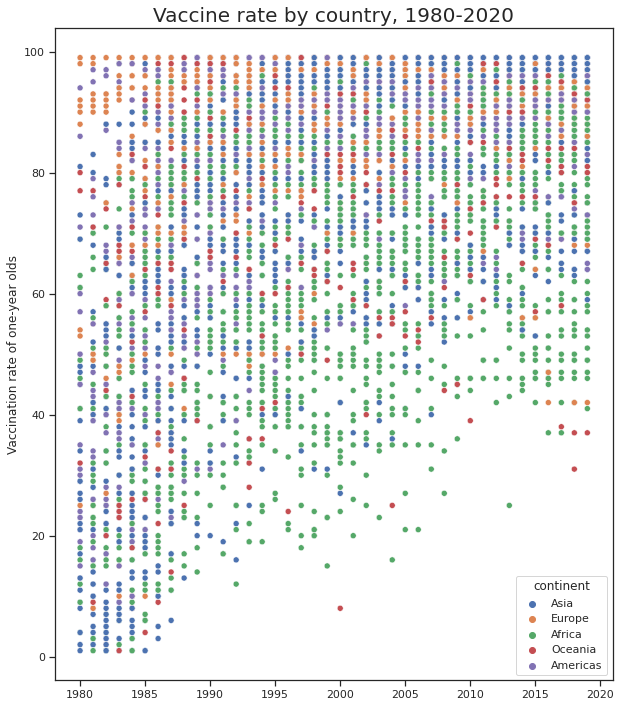

In [7]:
# Vaccine rate by country 1980-2020
plt.figure(figsize = (10,12))
plt.title("Vaccine rate by country, 1980-2020",fontsize=20)
vaccine_scatter = sns.scatterplot(data = df_countries, x="Year", y="Vaccine Rate", hue="continent")
vaccine_scatter.set(ylabel="Vaccination rate of one-year olds",xlabel="")
plt.show()